# Gapminder Exploration & Visualization


I walk through an exploratory analysis of Gapminder's 2007 global development data, including summary statistics, box and violin plots, histograms, heatmaps, and high level observations. Additionally, I've recreated Hans Rosling's colorful multivariate bubble chart using seaborn. In a future post, I'll recreate Rosling's famous TED talk animated time-series bubble plot using plotly.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# The code was removed by Watson Studio for sharing.

In [2]:
df = pd.read_csv(body)

In [3]:
# Glance at first few rows of the dataset to get a feel for it
df.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338
1,23,Albania,2007,3600523,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465
3,47,Angola,2007,12420476,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640


In [4]:
# The dataset includes 142 rows and 7 columns
df.shape

(142, 7)

In [5]:
# Summary statistics of GDP per capita. Notice the wide min-max range.  
# The mean > the median (50%) meaning the distribution is right-skewed.
df["gdp_cap"].describe()

count      142.000000
mean     11680.071820
std      12859.937337
min        277.551859
25%       1624.842248
50%       6124.371109
75%      18008.835640
max      49357.190170
Name: gdp_cap, dtype: float64

In [6]:
# Summary statistics of life expectancy. It ranges from a min of 40 years to a max of 83 years. 
# The mean < the median (50%), meaning the distribution is left-skewed.
df["life_exp"].describe()

count    142.000000
mean      67.007423
std       12.073021
min       39.613000
25%       57.160250
50%       71.935500
75%       76.413250
max       82.603000
Name: life_exp, dtype: float64

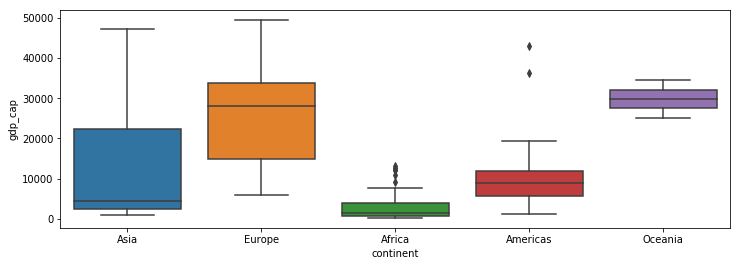

In [7]:
# A box plot of GDP per capita stratified by continent shows that Europe has the highest median GDP per capita,
# though it has a wide IQR. Asia has a relatively low GDP per capita, but with a large spread with countries
# like Singapore and China on the higher end. In Americas, the two outliers represent USA and Canada. 

plt.figure(figsize=(12, 4))
sns.boxplot(df.continent, df.gdp_cap)

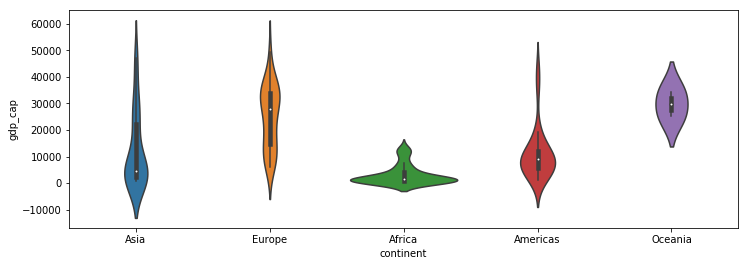

In [8]:
# Violin plots reveal more on the shape of the distribution. Asia, Africa, and Americas have a lower 
# GDP per capita than Europe, though are heavily right-skewed. 
plt.figure(figsize=(12, 4))
sns.violinplot(df.continent, df.gdp_cap)

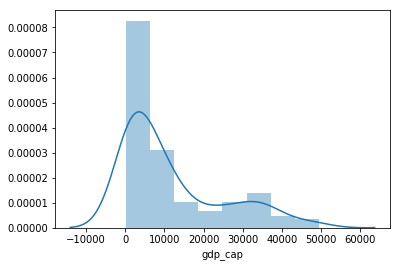

In [9]:
# A histogram illustrates GDP per capita's right-skewed distribution, with a majority of countries below 20k.
sns.distplot(df.gdp_cap)

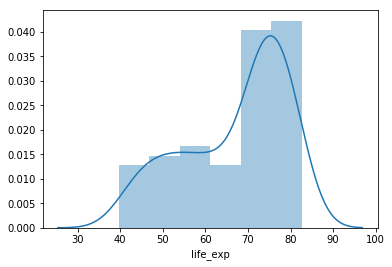

In [10]:
# A histogram illustrates life expectancy's left-skewed distrbution.
sns.distplot(df.life_exp)

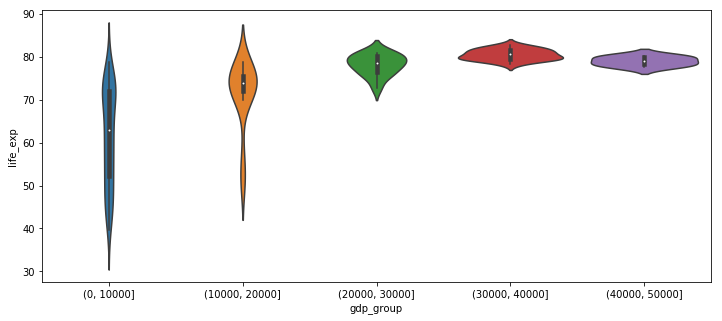

In [11]:
# A violin plot of life expectancy stratifed by sub-ranges of GDP per capita illustrates how life expectancy
# varies among different income groups. In the higher income groups, median life expectancy is higher with tighter spread. 
# Lower income brackets present a lower median life expectancy with a wider spread and left skew. 
df["gdp_group"] = pd.cut(df.gdp_cap, [0, 10000, 20000, 30000, 40000, 50000])
plt.figure(figsize=(12, 5))
sns.violinplot(x="gdp_group", y="life_exp", data=df)

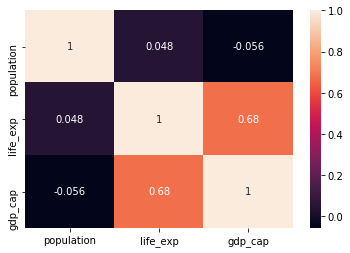

In [12]:
# A heatmap of correlation illustrates the moderately strong correlation of 0.68 between life expectancy and GDP per capita. 
df_corr = df.loc[:,["population", "life_exp", "gdp_cap"]]
sns.heatmap(df_corr.corr(), annot=True)

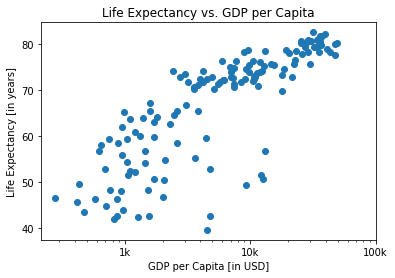

In [13]:
# A scatter plot using matplotlib shows higher GDP per capita tending toward higher life expectancy.
# Since GDP per capita varies geometrically (multiplicatively) rather than arithmetically (additively) by country, I've used a log scale
# for the x axis to better visualize the upward trend in life expectancy. 

plt.scatter(df["gdp_cap"], df["life_exp"])
plt.xlabel("GDP per Capita [in USD]")
plt.ylabel("Life Expectancy [in years]")
plt.title("Life Expectancy vs. GDP per Capita")
plt.xscale("log")
plt.xticks([1000, 10000, 100000], ["1k", "10k", "100k"])
plt.show()

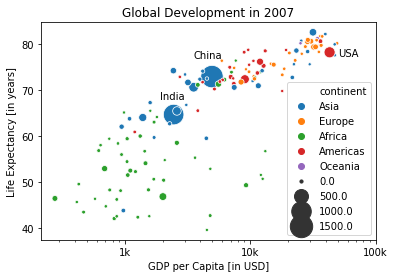

In [14]:
# I use seaborn to take the scatter plot to the next level, varying bubble size by population and
# color by continent. Seaborn is more powerful than matplotlib for customized multi-dimensional plots.
# For example, seaborn automatically color codes the continents by setting the argument hue equal to 
# df["continent"] without needing to create a separate color-based numpy array. 

pop = np.array(df.population) / 1000000
sns.scatterplot(df["gdp_cap"], df["life_exp"], hue = df["continent"], size = pop, sizes = (10,500))
plt.xlabel("GDP per Capita [in USD]")
plt.ylabel("Life Expectancy [in years]")
plt.title("Global Development in 2007")
plt.xscale("log")
plt.xticks([1000, 10000, 100000], ["1k", "10k", "100k"])
plt.text(1900,68,"India")
plt.text(3500,77,"China")
plt.text(50000,77.5,"USA")
plt.show()